# Import the libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from miceforest import ImputationKernel
import mglearn
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv(r"G:\coursera\projects\Spaceship Titanic\train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
Id=df.PassengerId
df=df.drop('PassengerId',axis=1)
print(Id.head())

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object


In [12]:
df.shape

(8693, 13)

# cleaning the data set

In [1]:
# Split the 'name' column on the space character (`/`)
df[['deck', 'num','side']] = df['Cabin'].str.split('/',expand=True)
df=df.drop("Cabin",axis=1)

NameError: name 'df' is not defined

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  deck          8494 non-null   object 
 13  num           8494 non-null   object 
 14  side          8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [15]:
#Remove whitespace from column names
df.columns = df.columns.str.strip()

In [16]:
df["num"]=df['num'].astype(float)

In [17]:
null= df.isna().sum() 
print(null[null != 0])

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
deck            199
num             199
side            199
dtype: int64


In [18]:
#convert object into category
df = pd.concat([
        df.select_dtypes([], ['object']),
        df.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           8514 non-null   float64 
 1   RoomService   8512 non-null   float64 
 2   FoodCourt     8510 non-null   float64 
 3   ShoppingMall  8485 non-null   float64 
 4   Spa           8510 non-null   float64 
 5   VRDeck        8505 non-null   float64 
 6   Transported   8693 non-null   bool    
 7   num           8494 non-null   float64 
 8   HomePlanet    8492 non-null   category
 9   CryoSleep     8476 non-null   category
 10  Destination   8511 non-null   category
 11  VIP           8490 non-null   category
 12  Name          8493 non-null   category
 13  deck          8494 non-null   category
 14  side          8494 non-null   category
dtypes: bool(1), category(7), float64(7)
memory usage: 877.1 KB


In [19]:
#remove the Name column as it is not necessary for model training.
df=df.drop("Name",axis=1)

In [65]:
#This is a multivariate imputation technique, 
#meaning that the missing information is filled by taking into consideration the information from the other columns. 
mice_kernel = ImputationKernel(
data = df,
save_all_iterations = True,
random_state = 64,
)


C:\ProgramData\anaconda3\Lib\site-packages\miceforest\ImputationKernel.py:371: UserWarning: [deck] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


In [21]:
#we run the kernel on the data for two iterations, and finally, create the imputed data.
mice_kernel.mice(2)
df = mice_kernel.complete_data()
null= df.isna().sum() 


In [ ]:
df["deck"].null

In [23]:
df["num"]=df['num'].astype(int)

In [24]:
count_values = df.Transported.value_counts()
count_values


Transported
True     4378
False    4315
Name: count, dtype: int64

# Numerical data distribution

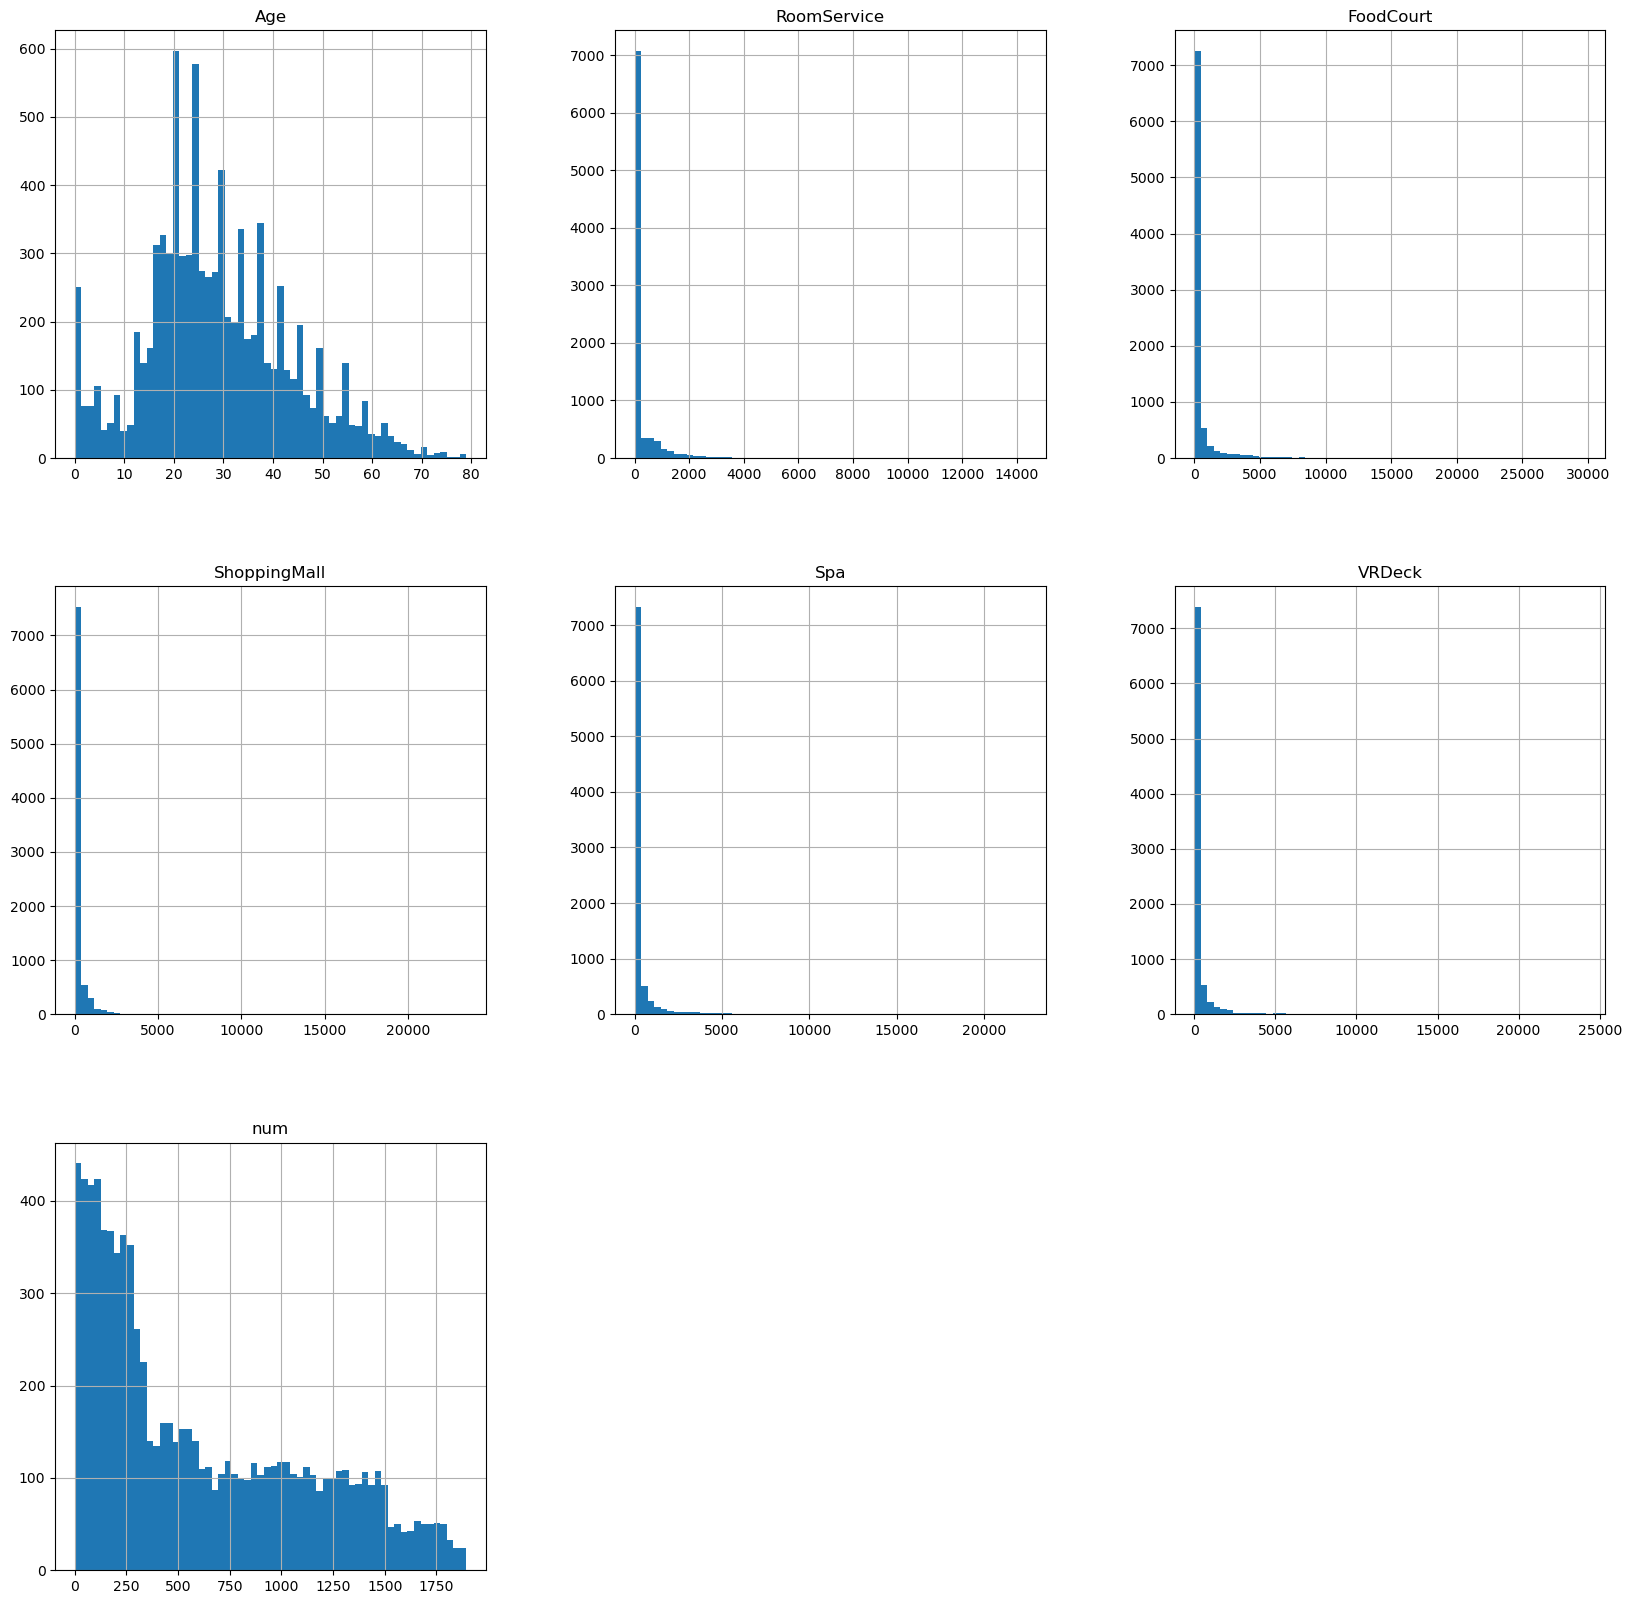

In [25]:
#  plot the distribution for all the numerical features.
df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","num"]].hist(bins=60,figsize=(20,20));

In [26]:
# checking string-enccoded categorical data
#Selecting only the category columns
category_columns=df.select_dtypes(include='category')
#display the value counts for each category column
for column in category_columns:
    print("Value counts for column'{column}':")
    print(df[column].value_counts())
    print()

Value counts for column'{column}':
HomePlanet
Earth     4718
Europa    2173
Mars      1802
Name: count, dtype: int64

Value counts for column'{column}':
CryoSleep
False    5577
True     3116
Name: count, dtype: int64

Value counts for column'{column}':
Destination
TRAPPIST-1e      6053
55 Cancri e      1833
PSO J318.5-22     807
Name: count, dtype: int64

Value counts for column'{column}':
VIP
False    8493
True      200
Name: count, dtype: int64

Value counts for column'{column}':
deck
F    2855
G    2617
E     897
B     805
C     767
D     485
A     262
T       5
Name: count, dtype: int64

Value counts for column'{column}':
side
S    4392
P    4301
Name: count, dtype: int64



#  Building a Model With Evaluation and Improvment

In [27]:
# split into x, y
y_set=df.Transported
x_set=df.drop(['Transported'],axis=1)

print(f"the shape of the inputs x is: {x_set.shape}")
print(f"the shape of the targets y is: {y_set.shape}")

the shape of the inputs x is: (8693, 13)
the shape of the targets y is: (8693,)


In [28]:
data_dummies=pd.get_dummies(x_set)
data_dummies.shape

(8693, 27)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data_dummies, y_set,test_size=0.30, random_state=30)
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}\n")

the shape of the training set (input) is: (6085, 27)
the shape of the training set (target) is: (6085,)

the shape of the validation set (input) is: (2608, 27)
the shape of the validation set (target) is: (2608,)



The key of the dicitionary are the names of parameters we want to adjust and the values are the parameter settings we want to try out.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split=StratifiedShuffleSplit(test_size=0.1,train_size=0.9,n_splits=5,random_state=20)
gbrt=GradientBoostingClassifier()
scores=cross_val_score(gbrt,x_train,y_train,cv=shuffle_split)
scores.mean()

0.813464696223317

In [31]:
param_grid={ 'learning_rate':[0.1,0.3,0.4,0.5,0.6],
           'n_estimators':[5,10,30,40,50]}
print("parameter grid:\n{}".format(param_grid))

parameter grid:
{'learning_rate': [0.1, 0.3, 0.4, 0.5, 0.6], 'n_estimators': [5, 10, 30, 40, 50]}


We can now instantiate the GridSearchCV class with the model (GradientBoostingClassifier), the parameter grid to search (param_grid), and the cross-validation strategy we want to use (say, ten-fold stratified cross-validation):

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=shuffle_split)

when we call fit, it will run cross-validation for each combination of parameters 

In [33]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.1,
            train_size=0.9),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [5, 10, 30, 40, 50]})

In [34]:
print("Best parameters:{}".format(grid_search.best_params_))
print("test score:{:.3f}".format(grid_search.score(x_test,y_test)))
print("Best cross-validation score:{:.3f}".format(grid_search.best_score_))

Best parameters:{'learning_rate': 0.3, 'n_estimators': 30}
test score:0.825
Best cross-validation score:0.812


In [35]:
# convert to DataFrame
results=pd.DataFrame(grid_search.cv_results_)
# Extract the mean validation scores,then we reshape the scores so that the axes correspond to learning_rate and n_estimators
scores=np.array(results.mean_test_score).reshape(5,5)

The colors encodes the cross-validation accuracy, with light colors meaning high accuracy and dark colors meaning low accuracy

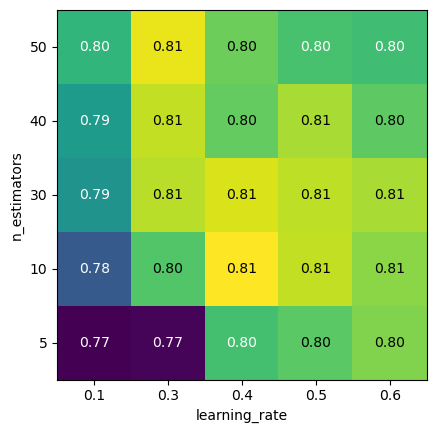

In [36]:
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores,xlabel='learning_rate',xticklabels=param_grid['learning_rate'],ylabel='n_estimators',
                      yticklabels=param_grid["n_estimators"],cmap="viridis")

### Evaluation Metrics and Scoring 

In [37]:
pred=grid_search.predict(x_test)

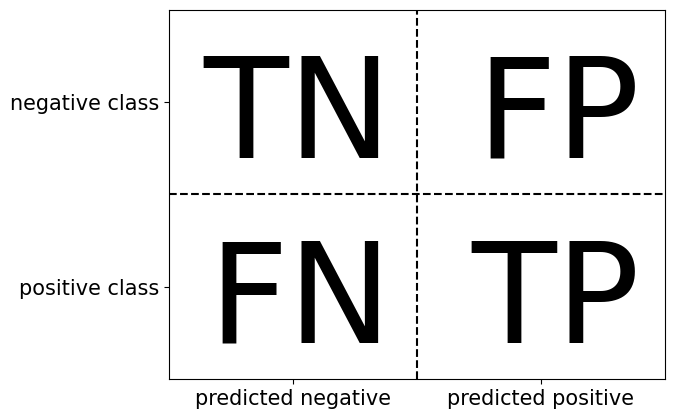

In [38]:
mglearn.plots.plot_binary_confusion_matrix()

In [39]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print("Confusion matrix\n{}".format(confusion))

Confusion matrix
[[ 997  270]
 [ 186 1155]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=["False","True"]))

              precision    recall  f1-score   support

       False       0.84      0.79      0.81      1267
        True       0.81      0.86      0.84      1341

    accuracy                           0.83      2608
   macro avg       0.83      0.82      0.82      2608
weighted avg       0.83      0.83      0.82      2608



Text(0, 0.5, 'Recall')

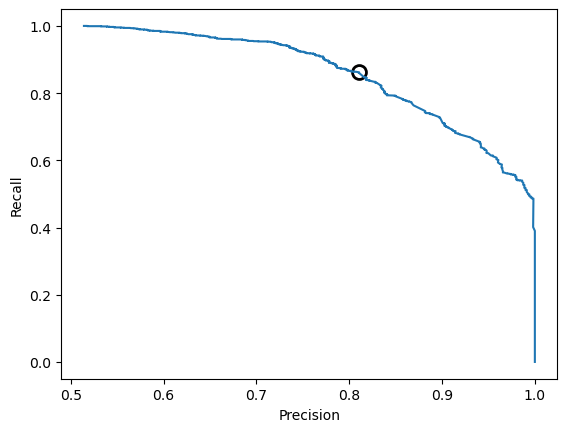

In [41]:
 #precision_recall_curve returns a list of precision and recall values for all possible thresholds in sorted order
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,grid_search.decision_function(x_test))
# find threshold closest to zero
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

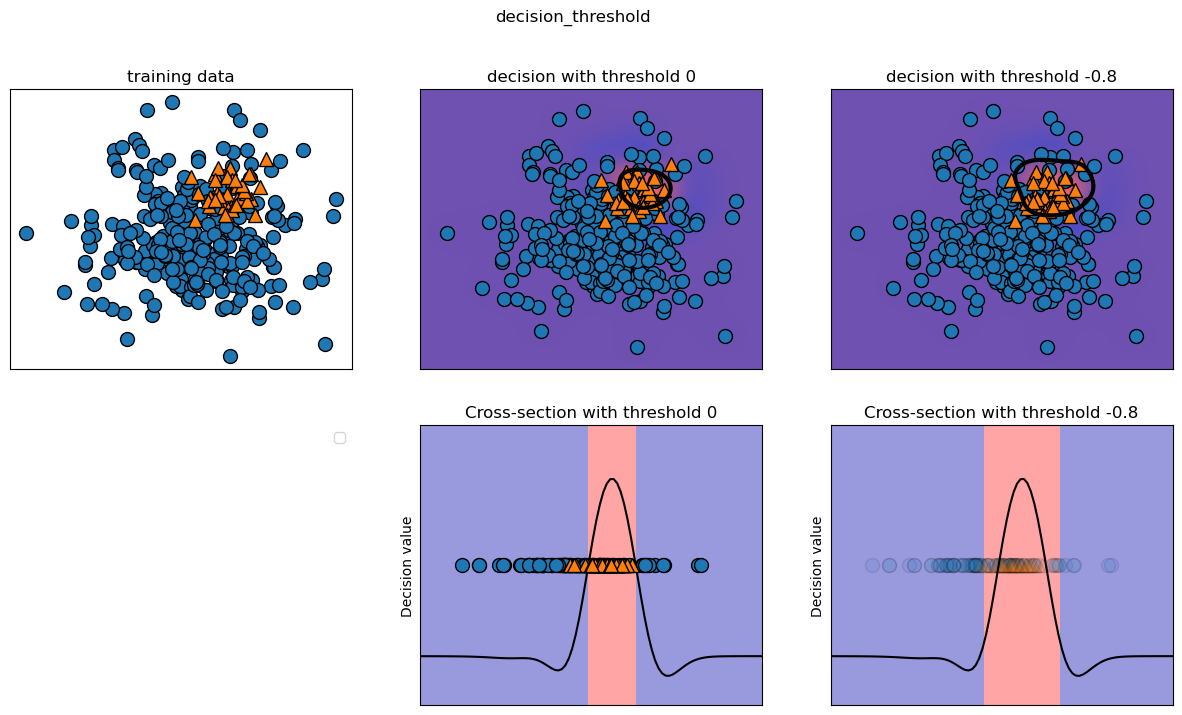

In [42]:
mglearn.plots.plot_decision_threshold()

In [43]:
y_pred_threshold=grid_search.decision_function(x_test)>0.2
print(classification_report(y_test,y_pred_threshold,target_names=["False","True"]))

              precision    recall  f1-score   support

       False       0.80      0.84      0.82      1267
        True       0.84      0.80      0.82      1341

    accuracy                           0.82      2608
   macro avg       0.82      0.82      0.82      2608
weighted avg       0.82      0.82      0.82      2608



In [44]:
confusion=confusion_matrix(y_test,y_pred_threshold)
print("confusion matrix\n{}".format(confusion))

confusion matrix
[[1060  207]
 [ 269 1072]]


# Loading the test data

In [45]:
data_test=pd.read_csv(r"G:\coursera\projects\Spaceship Titanic\test.csv")
print("x_test shape:{}".format(data_test.shape))

x_test shape:(4277, 13)


In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## cleaning the data set 

In [47]:
Id_test=data_test.PassengerId
data_test=data_test.drop('PassengerId',axis=1)

In [48]:
# Split the 'name' column on the space character (`/`)
data_test[['deck', 'num','side']] = data_test['Cabin'].str.split('/',expand=True)
data_test=data_test.drop("Cabin",axis=1)

In [49]:
data_test.columns = data_test.columns.str.strip()

In [50]:
data_test["num"]=data_test['num'].astype(float)

In [51]:
#convert object into category
data_test = pd.concat([
        data_test.select_dtypes([], ['object']),
        data_test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           4186 non-null   float64 
 1   RoomService   4195 non-null   float64 
 2   FoodCourt     4171 non-null   float64 
 3   ShoppingMall  4179 non-null   float64 
 4   Spa           4176 non-null   float64 
 5   VRDeck        4197 non-null   float64 
 6   num           4177 non-null   float64 
 7   HomePlanet    4190 non-null   category
 8   CryoSleep     4184 non-null   category
 9   Destination   4185 non-null   category
 10  VIP           4184 non-null   category
 11  Name          4183 non-null   category
 12  deck          4177 non-null   category
 13  side          4177 non-null   category
dtypes: category(7), float64(7)
memory usage: 430.0 KB


In [52]:
null= data_test.isna().sum() 
print(null[null != 0])

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
num             100
HomePlanet       87
CryoSleep        93
Destination      92
VIP              93
Name             94
deck            100
side            100
dtype: int64


In [53]:
data_test=data_test.drop("Name",axis=1)

In [54]:
#This is a multivariate imputation technique, 
#meaning that the missing information is filled by taking into consideration the information from the other columns. 
mice_kernel = ImputationKernel(
data = data_test,
save_all_iterations = True,
random_state = 64,
)


C:\ProgramData\anaconda3\Lib\site-packages\miceforest\ImputationKernel.py:371: UserWarning: [deck] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


In [55]:
#we run the kernel on the data for two iterations, and finally, create the imputed data.
mice_kernel.mice(2)
data_test = mice_kernel.complete_data()
null= df.isna().sum() 


In [56]:
data_test["num"]=data_test['num'].astype(int)

In [57]:
# checking string-enccoded categorical data
#Selecting only the category columns
category_columns=data_test.select_dtypes(include='category')
#display the value counts for each category column
for column in category_columns:
    print("Value counts for column'{column}':")
    print(data_test[column].value_counts())
    print()

Value counts for column'{column}':
HomePlanet
Earth     2303
Europa    1024
Mars       950
Name: count, dtype: int64

Value counts for column'{column}':
CryoSleep
False    2700
True     1577
Name: count, dtype: int64

Value counts for column'{column}':
Destination
TRAPPIST-1e      3021
55 Cancri e       860
PSO J318.5-22     396
Name: count, dtype: int64

Value counts for column'{column}':
VIP
False    4196
True       81
Name: count, dtype: int64

Value counts for column'{column}':
deck
F    1483
G    1258
E     458
B     367
C     360
D     245
A     100
T       6
Name: count, dtype: int64

Value counts for column'{column}':
side
S    2147
P    2130
Name: count, dtype: int64



In [58]:
data_dummies_test=pd.get_dummies(data_test)
data_dummies_test.shape

(4277, 27)

In [59]:
y_hat_threshold=grid_search.decision_function(data_dummies_test)>0.15

In [60]:
output_gbrt = pd.DataFrame({'PassengerId': Id_test,
                       'Transported': y_hat_threshold})
output_gbrt.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [61]:
count_values = output_gbrt.Transported.value_counts()
count_values

Transported
False    2153
True     2124
Name: count, dtype: int64

In [62]:
output_gbrt.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
